In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# fardina has a priming question before the AITA questions

df1 = pd.read_csv('data/max_spring2025.csv')
df2 = pd.read_csv('data/max_all.csv')
df3 = pd.read_csv('data/fardina_all.csv')
df4 = pd.read_csv('data/2024.csv')

In [5]:
df1.columns

Index(['Timestamp', 'What year are you?', 'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
       'My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?',
       'My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-moth

In [6]:
#exact phrasings for df1 questions
questions = [
    'Timestamp', 
    'What year are you?', 
    'How old are you?',
       'You could describe the adults you grew up with as...',
       'You could describe yourself as...',
       'How would you rate your religiousness?',
       'What bests represents your gender?',
      "My boyfriend is a doctor. Lately he's been complaining about pain in his right knee and constantly taking TONS of ibuprofen to treat (like 15-20 pills a day). However, it's only gotten worse. I've told him he needs to see someone about it but he told me it was fine. So I told him that if this is how he treats herself, I'd be concerned about being his patient. He was shocked and told me that was uncalled for. Am I a jerk?",
       "My son is getting married soon. Due to a complicated past, we've only just met recently. We've been building a relationship the last few years though and I am lucky to have him in my life now. Recently, he asked me to do a reading with his father while I am honored I told him no. His step-mother practically raised him from a baby and I think that she deserves it far more than me. He was really upset and hurt when I said no. Am I a jerk?'",
       "I'm a trust fund kid; I get a healthy 'allowance' from my parents, but I mostly sock it away since I don't really feel like I deserve it. I live with my boyfriend, who comes from a poor family, and we split things 50-50. Recently, he found out how much money my parents send me each month and freaked out, saying it wasn't fair that I was making him split things 50/50. I told him it was my money, and it only seems fair if we cover half the expenses. Am I a jerk?",
       "My husband and I have separate finances, but I pay for almost everything. My son starts school next year, and I'm planning on sending him to a private school. My husband's son currently goes to a much less nice public school. My husband says I'm a jerk for not paying for his son to go to private school as well.",
       "I saw a poster for a lost cat advertising a 500 dollar reward. I saw the cat, tracked it down, and called the owner. When I met with them, they said there wasn't actually a reward, they had just listed one because they thought it would motivate people to find the cat. I kept the cat until they coughed up the reward money. Am I a jerk?",
       "My brother's nine year old son is poorly behaved. One day, my brother dropped the son off on my doorstep without my consent and drove off, texting me that he needed me to watch his son for the day. The son complained of being hungry, so I gave him the leftovers I had. He said he didn't like them, but I told him that's all there was. He put them in the microwave until they burned, then told me he couldn't eat them and we would have to go out and get food. I told him that was what there was to eat, and if he ruined it he'd have to wait for his dad to get back. Later, everyone yelled at me for 'starving' a child. Am I a jerk?",
       "My parents want us to come out for their anniversary, and bought my brother and I tickets on the same flight. My brother has two kids - a 6 month old and a 5 year old. He is currently separated from his wife so he would have to handle 2 children by herself on a 10 hour flight.\n\nHe calls me up a week or so beforehand and asks me if I will be willing to help him take care of his kids on the flight, and something about taking shifts so we can both sleep. I tell him that I wasn't comfortable with that, but he says 'nephew loves you so much' so we can work something out on the flight and hangs up.\n\nWhen I got to the airport, I chose to upgrade my seat so I could sit by myself and didn't mention it until we were on the plane. My family freaked and told me I abandoned my brother. Am I a jerk?",
       "I'm a single dad with four kids, one of whom has a different mother from the other three. I get a lot of child support for one of them, and none for the other 3. 2/3rds of the child support for the eldest go towards his expenses and college fund. The other third goes towards my other children. My friend recently found out and told me it was inappropriate to use the child support intended for the one on the other three. Am I a jerk?",
       "I have a child with a father who never wanted anything to do with them. I make enough money to cover my expenses, but I constantly check up on the child's father to make sure he's paying adequate child support. Periodically I either hire an investigator or her dad just tells me he got a raise and I go to court to adjust the child support accordingly. The last time I did this, he didn't show up for court and I apparently overestimated how much his raise was and I got a default judgment. He called me up and practically pleaded with me to lower his payments after I said no he insulted me and my son. Am I a jerk?",
       "One of my children wants to go to an expensive school to become a dentist. I told them I'd be fine paying for it. The other one wants to go to a similarly expensive school to become a teacher. I told her that I wouldn't pay for him schooling unless he picked a career path that will make at least 100,000 a year. Am I a jerk?",
       "I was in a conflict with my father-in-law's girlfriend, in which I made a snide comment about she's never paid child support to his ex. Later, she called me and told me if I ever said anything like that ever again she'd sue me for defamation. I took the threat seriously, as she is a lawyer, and uninvited him for our wedding and told my family I couldn't be around him anymore. Am I a jerk?",
       "Some of my relatives refuse to come to my wedding, since they don't approve of our 'lifestyle'. I would like to donate the money I will save to an LBGTQ organization in their name. I’m hoping that I or the organization will be able to send them a receipt/thank you for the donation. Would I be a jerk?",
       "My wife has decided that since she can’t drink because she is pregnant that I can’t either. I planned to take my annual leave from work to take us (and pay for) a trip abroad. I asked my wife would the drinking rule still be in effect and she said of course. I’ve now decided I won’t be paying for us to take this trip. Am I jerk?",
       "My brother is going to be a groomsman at my wedding. His hair was dyed, but he recently decided to grow it out, so parts of it are bleached and part are not. I told him it wouldn't look good in the pictures, and offered to pay for him to dye it. He said no, and I said he couldn't be in the wedding party. Am I a jerk?",
      ]

questions_succint = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

questions_succint_primer = [
    "time",
    "year",
    "age",
    "upbringing",
    "self",
    "religion",
    "gender",
    "compassion primer",
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

aita_questions = [
    "doctor",
    "reading",
    "trust fund",
    "private school",
    "cat",
    "burned food",
    "flight",
    "child support",
    "investigation",
    "expensive school",
    "in law",
    "lgbtq",
    "drinking",
    "hair dye",
]

In [7]:
df1.columns = questions_succint
df2.columns = questions_succint
df3.columns = questions_succint_primer
df4.columns = questions_succint
    

In [8]:
# Not a jerk = 0, Mildly a jerk = 1, Strongly a jerk = 2
aita_values = [aita_questions[i] + " numeric" for i in range(len(aita_questions))] 
aita_values

['doctor numeric',
 'reading numeric',
 'trust fund numeric',
 'private school numeric',
 'cat numeric',
 'burned food numeric',
 'flight numeric',
 'child support numeric',
 'investigation numeric',
 'expensive school numeric',
 'in law numeric',
 'lgbtq numeric',
 'drinking numeric',
 'hair dye numeric']

In [9]:
for i in range(len(aita_questions)):
    df1[aita_values[i]] = df1[aita_questions[i]].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})
    df2[aita_values[i]] = df2[aita_questions[i]].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})
    df3[aita_values[i]] = df3[aita_questions[i]].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})
    df4[aita_values[i]] = df4[aita_questions[i]].map({'Not a jerk': 0, 'Mildly a jerk': 1, 'Strongly a jerk': 2})

In [10]:
df1["age"] = df1["age"].fillna(df1["age"].mode())

In [11]:
df_age = df1[df1["age"] != "50+"]


In [12]:
df_age["age numeric"] = df_age["age"].astype(float)

C:\Users\jonat\AppData\Local\Temp\ipykernel_41296\1181843574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age["age numeric"] = df_age["age"].astype(float)


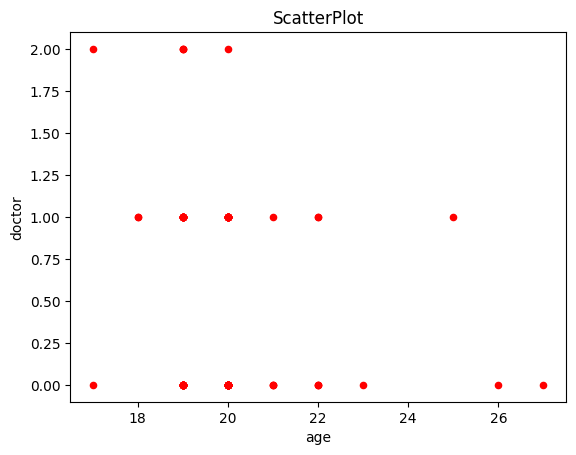

In [13]:

fig, ax = plt.subplots()

df_age.plot(kind='scatter', x='age numeric', y='doctor numeric', color='red', ax=ax, title='ScatterPlot')
ax.set_xlabel("age")
ax.set_ylabel("doctor")

plt.show()

In [14]:
df3.groupby("age")["doctor numeric"].value_counts()

age  doctor numeric
17   0.0                1
18   0.0                3
     1.0                2
19   1.0               19
     0.0               11
     2.0                1
20   1.0               38
     0.0               20
     2.0                6
21   1.0               16
     0.0                9
22   1.0                2
23   1.0                3
     0.0                2
24   2.0                1
25   1.0                2
28   1.0                1
29   1.0                1
50+  2.0                1
Name: count, dtype: int64

In [15]:
"""
things to look into:

does previous answer affect next answer
    fardina uses priming question
    
does spirituality affect answers
does upbringing affect answers  
does year affect answers
does gender affect answers

is there some combination of two + factors that affect answers


"""

'\nthings to look into:\n\ndoes previous answer affect next answer\n    fardina uses priming question\n    \ndoes spirituality affect answers\ndoes upbringing affect answers  \ndoes year affect answers\ndoes gender affect answers\n\nis there some combination of two + factors that affect answers\n\n\n'

In [26]:
for i in range(len(aita_values) - 1):
    df1[aita_values[i+1] + " " + aita_values[i]] = df1[aita_values[i+1]] - df1[aita_values[i]]


In [ ]:
for i in range(len(aita_values) - 1):
    print(df1[aita_values[i+1] + " " + aita_values[i]].value_counts())

# why do these all look so similar? ~40, 35, 15 

reading numeric doctor numeric
 0.0    36
 1.0    31
-1.0    19
 2.0     3
-2.0     3
Name: count, dtype: int64
trust fund numeric reading numeric
 0.0    36
-1.0    21
 1.0    21
 2.0     8
-2.0     6
Name: count, dtype: int64
private school numeric trust fund numeric
 0.0    45
-1.0    21
 1.0    14
-2.0     8
 2.0     4
Name: count, dtype: int64
cat numeric private school numeric
 0.0    39
 1.0    31
-1.0    12
 2.0     8
-2.0     1
Name: count, dtype: int64
burned food numeric cat numeric
 0.0    38
-1.0    27
 1.0    13
-2.0    11
 2.0     1
Name: count, dtype: int64
flight numeric burned food numeric
 1.0    35
 0.0    30
 2.0    18
-1.0     5
-2.0     2
Name: count, dtype: int64
child support numeric flight numeric
-1.0    33
-2.0    21
 0.0    17
 2.0     9
 1.0     7
Name: count, dtype: int64
investigation numeric child support numeric
 0.0    33
 1.0    22
 2.0    13
-1.0    12
-2.0     5
Name: count, dtype: int64
expensive school numeric investigation numeric
 0.0    29
 1.

In [34]:
# how do people change their answers depending on the previous answer?
for i in range(len(aita_values)-1):
    print(df1.groupby(aita_values[i])[aita_values[i+1] + " " + aita_values[i]].value_counts(sort=False))

doctor numeric  reading numeric doctor numeric
0.0              0.0                              24
                 1.0                              25
                 2.0                               3
1.0             -1.0                              18
                 0.0                              11
                 1.0                               6
2.0             -2.0                               3
                -1.0                               1
                 0.0                               1
Name: count, dtype: int64
reading numeric  trust fund numeric reading numeric
0.0               0.0                                  24
                  1.0                                  13
                  2.0                                   8
1.0              -1.0                                  18
                  0.0                                  11
                  1.0                                   8
2.0              -2.0                             

In [ ]:
"""

breakdown by what answer they have
"""